In [25]:
import pandas as pd
import numpy as np
import psycopg2
from psycopg2.extras import execute_values
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
from dateutil import parser

# Разведочный анализ данных

Перед проведением EDA необходимо загрузить данные из excel-таблицы

In [26]:
# загружаем данные о пользователях
df_users = pd.read_excel('marketplace_users_data.xlsx', sheet_name='users')

# загружаем данные о покупках
df_purchases = pd.read_excel('marketplace_users_data.xlsx', sheet_name='purchases')

## Общий обзор данных

__Проверяем размерность датасетов__

In [66]:
print(f'Количество строк и столбцов в df_users: {df_users.shape}')
print(f'Количество строк и столбцов в df_purchases: {df_purchases.shape}')

Количество строк и столбцов в df_users: (500, 6)
Количество строк и столбцов в df_purchases: (3000, 5)


__Изучаем типы данных в каждом датасете__

In [67]:
print(f'Типы данных столбцов df_users: \n {df_users.dtypes}')
print(f'\nТипы данных столбцов df_purchases: \n {df_purchases.dtypes}')

Типы данных столбцов df_users: 
 id              int64
name           object
age           float64
city           object
profession     object
join_date      object
dtype: object

Типы данных столбцов df_purchases: 
 id                int64
user_id           int64
purchase_date    object
amount           object
category         object
dtype: object


__Проверяем, есть ли пропущенные значения__

In [14]:
print(f'Количество пропусков в столбцах df_users: \n {df_users.isnull().sum()}')
print(f'Количество пропусков в столбцах df_purchases: \n {df_purchases.isnull().sum()}')

Количество пропусков в столбцах df_users: 
 id            0
name          0
age           0
city          0
profession    0
join_date     0
dtype: int64
Количество пропусков в столбцах df_purchases: 
 id                 0
user_id            0
purchase_date    312
amount           162
category         498
dtype: int64


__Проверяем, есть ли дубликаты__

In [69]:
print(f'Количество дубликатов в df_users: {df_users.duplicated().sum()}')
print(f'Количество дубликатов в df_purchases: {df_purchases.duplicated().sum()}')

Количество дубликатов в df_users: 0
Количество дубликатов в df_purchases: 0


__Просмотр количеств уникальных значений__

In [70]:
print(f'Количество уникальных значений в df_users: \n {df_users.nunique()}')
print(f'Количество уникальных значений в df_purchases: \n {df_purchases.nunique()}')

Количество уникальных значений в df_users: 
 id            500
name          471
age            78
city          490
profession     34
join_date     414
dtype: int64
Количество уникальных значений в df_purchases: 
 id               3000
user_id           500
purchase_date    1365
amount           2813
category           14
dtype: int64


## Анализ переменных пользователей

### df_users

__Статистический обзор столбца age__

In [71]:
print(f"Статистический обзор:\n{df_users['age'].describe()}")
print(f"\nКоличество нулевых значений: {df_users['age'].isnull().sum()}")

Статистический обзор:
count    464.000000
mean      50.415948
std       24.344305
min       18.000000
25%       34.000000
50%       48.000000
75%       61.000000
max      148.000000
Name: age, dtype: float64

Количество нулевых значений: 36


По полученным данным можно сделать вывод, что в столбце age присутствуют аномальные значения (возраст больше 100), а также имеются пропуски.     


Далее, __посмотрим на столбцы city и profession.__

In [ ]:
df_users[['city','profession']].head(10)

In [ ]:
# Просмотр уникальных значений для выявления опечаток
unique_professions = df_users['profession'].unique()
unique_professions

Видим, что в столбцах city и profession данные разнородные,есть пропуски, а также в столбце profession присутствуют опечатки в названии профессий.    
Также в столбце name видим, что есть пропущенные значения.

In [ ]:
print(f"Количество пропусков в столбце name df_users: {df_users['name'].isnull().sum()}")

__В столбце с датой регистрации__ наблюдаются разные форматы дат, а также пропущенные значения

In [155]:
df_users['join_date']. head(10)

0    2021-05-14 00:00:00
1    2021-09-19 00:00:00
2                    NaN
3    2023-11-13 00:00:00
4    2020-12-23 00:00:00
5    2021-07-14 00:00:00
6             2021/12/05
7    2023-02-01 00:00:00
8                    NaN
9    2022-11-04 00:00:00
Name: join_date, dtype: object

__Обзорная визуализация для диагностики данных__

Построение данных визуализаций помогает выявить пропуски, некорректные значения, неоднородность текста и аномалии

__*Анализ пропусков и распределения по столбцам*__   

Данный график отображает количество нулевых значений в столбцах датафрейма df_users

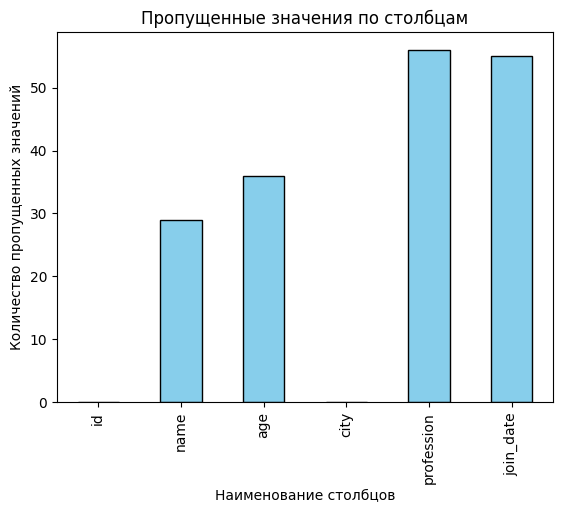

In [ ]:
# Пропуски по столбцам пользователей
df_users.isnull().sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Количество пропущенных значений')
plt.xlabel('Наименование столбцов')
plt.title('Пропущенные значения по столбцам')
plt.show()


__*Гистограмма распределения возраста с аномалиями*__    

Данный график показыват как часто встречаются разные возрастные группы среди пользователей

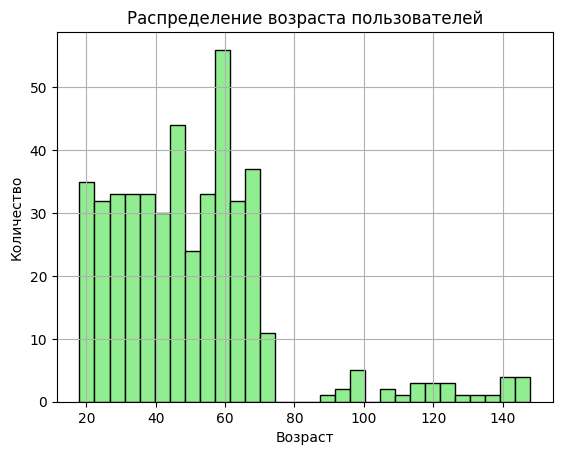

In [162]:
df_users['age'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

__*Топ-10 городов и профессий*__    

Построенные графики дают обзор распределения пользователей по городам и по профессиональной принадлежности, выявляя основные категории и долю пропусков или неконсистентных данных в текстовых столбцах.

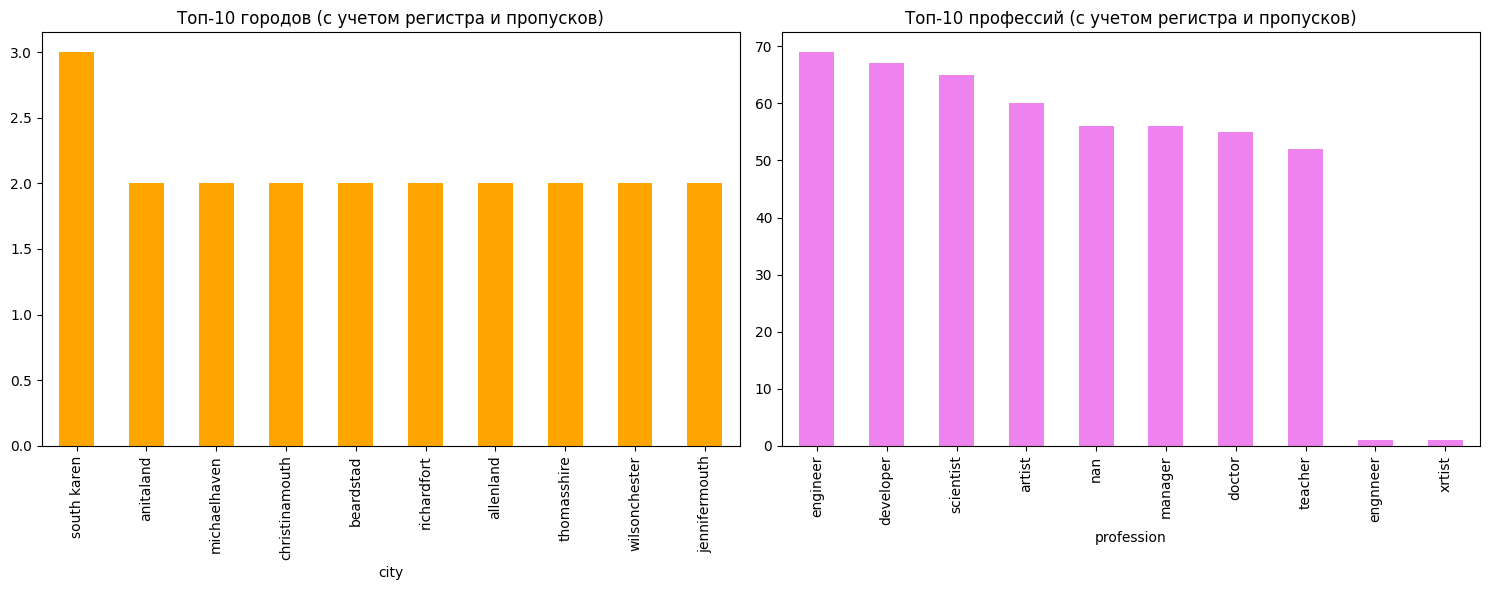

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 строка, 2 столбца с общей шириной

df_users['city'].str.lower().value_counts(dropna=False).head(10).plot(kind='bar', color='orange', ax=axes[0])
axes[0].set_title('Топ-10 городов (с учетом регистра и пропусков)')
df_users['profession'].str.lower().value_counts(dropna=False).head(10).plot(kind='bar', color='violet', ax=axes[1])
axes[1].set_title('Топ-10 профессий (с учетом регистра и пропусков и ошибок в названиях профессий)')
plt.tight_layout()  # для удобного размещения графиков
plt.show()

## Анализ переменных покупок

### df_purchases

__Анализ столбца сумма покупок (amount)__    

Посмотрим, сколько пропущенных значений в столбце amount

In [187]:
missing_count = df_purchases['amount'].isnull().sum()
print(f"Количество пропущенных значений в столбце amount: {missing_count}")

Количество пропущенных значений в столбце amount: 162


Помимо этого видно, что данные неоднородные, просутсвуют лишние пробелы и разные разделители

In [190]:
df_purchases['amount'].sample(10)

252      190.09
1173        NaN
1963     93.82 
804      161.27
2373     432.43
392      353.95
1106      51.96
2212    234,24 
110      970.63
2298     478.81
Name: amount, dtype: object

__Анализ столбца категория товаров (category)__

In [195]:
unique_category = df_purchases['category'].unique()
unique_category

array(['Books', nan, 'Electronics', 'Sports', 'Clothing', 'Cosmetics',
       'Toys', 'sports', 'toys', 'cosmetics', 'Food', 'clothing',
       'electronics', 'food', 'books'], dtype=object)

__Анализ столбца дата покупки (purchase_date)__    

В столбце с датой покупки наблюдаются разные форматы дат, а также пропущенные значения

In [198]:
df_purchases['purchase_date']. sample(10)

16      2023-11-16 00:00:00
2527             03-31-2024
2326             07-18-2025
131     2025-03-19 00:00:00
9       2023-12-09 00:00:00
701     2024-03-12 00:00:00
2166                    NaN
2876             05/06/2025
1116    2025-04-25 00:00:00
613     2023-11-13 00:00:00
Name: purchase_date, dtype: object

__Обзорная визуализация для диагностики данных__

__*Анализ пропусков и распределения по столбцам*__  

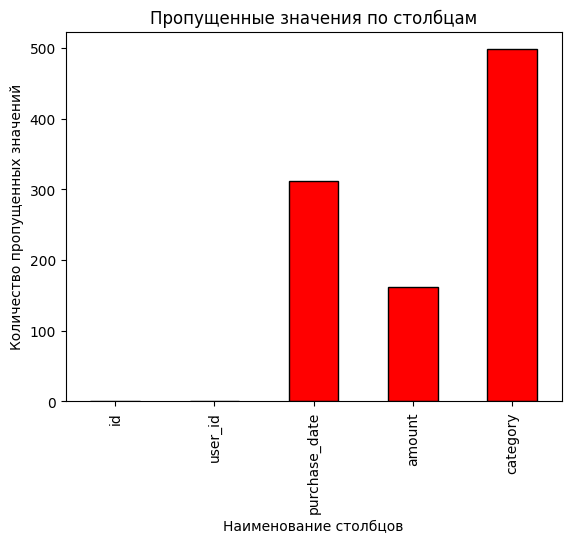

In [ ]:
# Пропуски по столбцам пользователей
df_purchases.isnull().sum().plot(kind='bar', color='red', edgecolor='black')
plt.ylabel('Количество пропущенных значений')
plt.xlabel('Наименование столбцов')
plt.title('Пропущенные значения по столбцам')
plt.show()

__*Распределение сумм покупок*__    

Перед построением гистограммы данные в стобце amount очитаются и приводятся к числу.

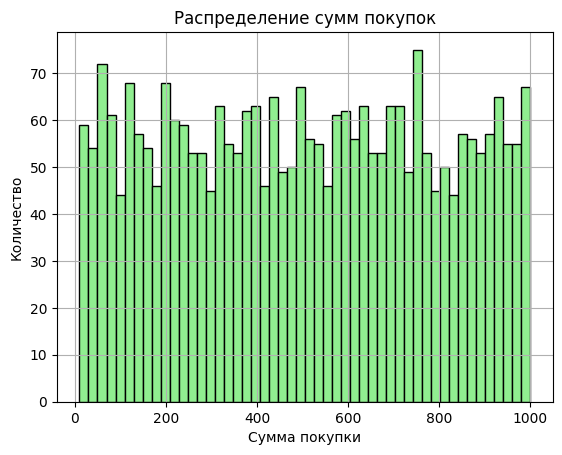

In [ ]:
df_purchases['amount'].apply(clean_amount).hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Распределение сумм покупок')
plt.xlabel('Сумма покупки')
plt.ylabel('Количество')
plt.show()


__*Распределение покупок по категориям*__    

Посчитаем количество покупок по категориям, предварительно приведя наименование категорий к нижнему регистру.

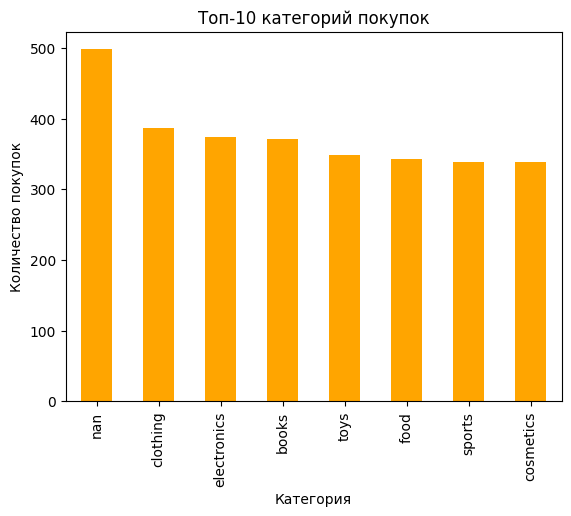

In [203]:
df_purchases['category'].str.lower().value_counts(dropna=False).head(10).plot(kind='bar', color='orange')
plt.title('Топ-10 категорий покупок')
plt.xlabel('Категория')
plt.ylabel('Количество покупок')
plt.show()


__*Динамика количества покупок по времени*__    

Для корректного отображения данных на графике приведем данные в столбце purchase_date к формату даты.

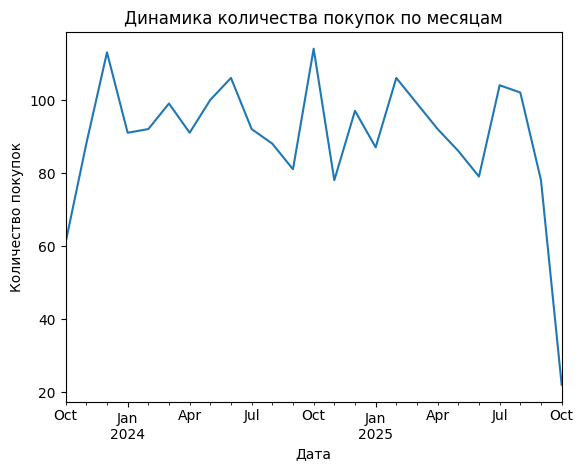

In [205]:
df_purchases['purchase_date_dt'] = pd.to_datetime(df_purchases['purchase_date'], errors='coerce')

df_purchases.groupby(pd.Grouper(key='purchase_date_dt', freq='ME')).size().plot()
plt.title('Динамика количества покупок по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество покупок')
plt.show()


## Взаимосвязь между таблицами

__*Проверим связь между таблицами df_users и ds_purchases*__    

 Проверим, что все user_id из таблицы покупок присутствуют в таблице пользователей 

In [27]:
# Множество user_id из обеих таблиц
users_set = set(df_users['id'])
purchases_users_set = set(df_purchases['user_id'])

# Проверка пользователей в покупках, которых нет в users
missing_users_in_df = purchases_users_set - users_set
print(f"Пользователи в покупках, отсутствующие в таблице пользователей: {missing_users_in_df}")

# Процент таких случаев
percent_missing = len(missing_users_in_df) / len(purchases_users_set) * 100
print(f"Процент user_id из покупок, отсутствующих среди пользователей: {percent_missing:.2f}%")


Пользователи в покупках, отсутствующие в таблице пользователей: set()
Процент user_id из покупок, отсутствующих среди пользователей: 0.00%


## Выявление аномалий и выбросов

__*Поиск отрицательных значений в суммах покупок*__

In [28]:
def clean_amount(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        x = x.strip().replace(',', '.')
    try:
        return float(x)
    except:
        return np.nan

neg_amounts = df_purchases[df_purchases['amount'].apply(clean_amount) < 0]
print(f"Количество отрицательных сумм покупок: {len(neg_amounts)}")
print(neg_amounts.head())


Количество отрицательных сумм покупок: 0
Empty DataFrame
Columns: [id, user_id, purchase_date, amount, category]
Index: []


__*Выявление аномального возраста пользователей*__

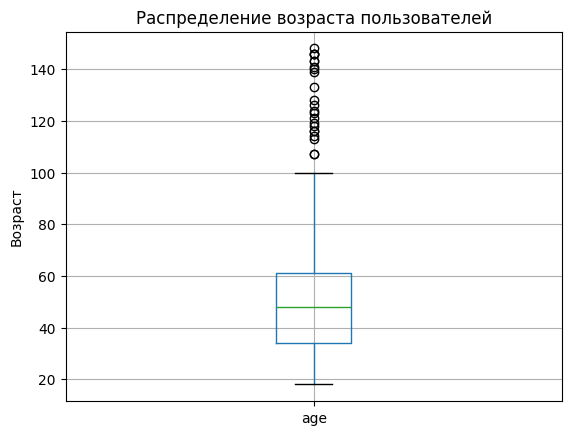

In [29]:
df_users.boxplot(column='age')
plt.title('Распределение возраста пользователей')
plt.ylabel('Возраст')
plt.show()


На данном графике видно, что есть аномальные значения возраста (больше 100).

## Очистка и трансформация данных

После того, как мы изучили данные, находящиеся в данных датасетах, можно приступать к трансофрмации данных для дальнейшей работы с этими данными.

### df_users

В столбце name удалим пробелы по краям, а также заменим пропущенные значения на "Unknown"

In [30]:
print(f"Количество пропусков в столбце name df_users: {df_users['name'].isnull().sum()}")
# Удаление пробелов по краям
df_users['name'] = df_users['name'].str.strip()
# Удаление строк где значение столбца name Nan
df_users['name'] = df_users['name'].fillna('Unknown')
print(f"Количество пропусков в столбцах df_users: {df_users['name'].isnull().sum()}")

Количество пропусков в столбце name df_users: 29
Количество пропусков в столбцах df_users: 0


Заменим анамальные значения и значения Nan в столбце age на медиану возраста для минимизации искажения данных для анализа.

In [31]:
# Вычисляем медиану для «нормальных» значений (например, от 0 до 100)
median_age = df_users.loc[df_users['age'].between(0, 100), 'age'].median()
# Помечаем аномальные значения (возраст вне диапазона 0-100)
anomalies_mask = ~df_users['age'].between(0, 100)
# Заменяем аномальные значения медианой
df_users.loc[anomalies_mask, 'age'] = median_age

# Заменяем также пропуски на медиану
df_users.fillna({'age': median_age}, inplace=True)

Приведение значений в столбцах city и profession к верхнему регистру для того, чтобы унифицировать данные

In [32]:
df_users['city'] = df_users['city'].str.upper()
df_users['profession'] = df_users['profession'].str.upper()

В столбце profession посмотрим уникальные значения для выявления опечаток.

In [33]:
unique_professions = df_users['profession'].unique()
unique_professions

array(['ENGINEER', nan, 'DOCTOR', 'ENGNNEER', 'TEACHER', 'SCIENTIST',
       'ARTIST', 'XRTIST', 'MANAGER', 'TEACHCR', 'DEVELOPER', 'DEVEDOPER',
       'GEACHER', 'SFIENTIST', 'SCIEWTIST', 'MANAGQR', 'DEVELOFER',
       'DEVELOPEU', 'SCWENTIST', 'PANAGER', 'MANAGPR', 'DOCTOE',
       'ENGIOEER', 'ECIENTIST', 'DODTOR', 'ASTIST', 'VNGINEER', 'ARTIWT'],
      dtype=object)

Видим, что есть опечатки в названии професий. Исправим вручную. Заменим пропущенные значения в столбце profession на "UNKNOWM PROFESSION"

In [34]:
df_users['profession'] = df_users['profession'].replace(
    ['ENGNNEER', 'ENGIOEER', 'VNGINEER'],
    'ENGINEER'
)
df_users['profession'] = df_users['profession'].replace(
    ['DOCTOE', 'DODTOR'],
    'DOCTOR'
)
df_users['profession'] = df_users['profession'].replace(
    ['SFIENTIST', 'SCIEWTIST', 'SCWENTIST', 'ECIENTIST'],
    'SCIENTIST'
)
df_users['profession'] = df_users['profession'].replace(
    ['XRTIST', 'ARTIWT', 'ASTIST'],
    'ARTIST'
)
df_users['profession'] = df_users['profession'].replace(
    ['TEACHCR', 'GEACHER', 'MANAGPR'],
    'TEACHER'
)
df_users['profession'] = df_users['profession'].replace(
    ['MANAGQR', 'PANAGER', 'MANAGPR'],
    'MANAGER'
)
df_users['profession'] = df_users['profession'].replace(
    ['DEVEDOPER', 'DEVELOFER', 'DEVELOPEU'],
    'DEVELOPER'
)

# Замена пропущенных значений в столбце profession
df_users['profession'] = df_users['profession'].fillna('UNKNOWN PROFESSION')



#Проверка
unique_professions = df_users['profession'].unique()
unique_professions

array(['ENGINEER', 'UNKNOWN PROFESSION', 'DOCTOR', 'TEACHER', 'SCIENTIST',
       'ARTIST', 'MANAGER', 'DEVELOPER'], dtype=object)

Столбец date_join приведем к типу datetime и удалим строки, где даты регистрации пропущенны (Nat).

In [35]:
# Преобразование строк в datetime
df_users['join_date'] = pd.to_datetime(df_users['join_date'])
# Замена пропущенных дат медианным значением 
median_date = pd.to_datetime(df_users['join_date'].astype('int64').median())
df_users.loc[df_users['join_date'].isna() | (df_users['join_date'] == pd.Timestamp(0)), 'join_date'] = median_date

### df_purchases

Столбец purchase_date приведем к типу datetime, удалим строки, где даты покупки пропущенны (Nat), а также с помощью пакета dateutil, используемого внутри pandas, динамически определим форматы дат.

In [36]:
# Создаем функцию, в которой даты приводятся к формату '%Y-%m-%d' с помощью parser
def parse_date(x):
    try:
        return parser.parse(x)
    except:
        return pd.to_datetime(x)

df_purchases['purchase_date'] = df_purchases['purchase_date'].apply(parse_date)

# Замена пропущенных дат медианным значением 
median_date = pd.to_datetime(df_purchases['purchase_date'].astype('int64').median())
df_purchases.loc[df_purchases['purchase_date'].isna() | (df_purchases['purchase_date'] == pd.Timestamp(0)), 'purchase_date'] = median_date

В столбце покупок amount данные неоднородные, а также присутствуют нулевые значения. Приведем занчения к типу float и заменим нулевые значение на среднее.

In [37]:
def clean_amount(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        x = x.strip().replace(',', '.')
    try:
        return float(x)
    except:
        return np.nan
    
df_purchases = df_purchases.copy()
df_purchases['amount'] = df_purchases['amount'].apply(clean_amount)

median_amount = df_purchases['amount'].median()
df_purchases.loc[:, 'amount'] = df_purchases['amount'].fillna(median_amount)

В столбце category данные неоднородные и имеются нулевые значения.    

In [38]:
#Проверка
unique_category = df_purchases['category'].unique()
unique_category

array(['Books', nan, 'Electronics', 'Sports', 'Clothing', 'Cosmetics',
       'Toys', 'sports', 'toys', 'cosmetics', 'Food', 'clothing',
       'electronics', 'food', 'books'], dtype=object)

Приведем столбец category к верхнему регистру. Заменим нулевые значения на "UNKNOWM CATEGORY"

In [39]:
# Приведение к верхнему регистру
df_purchases['category'] = df_purchases['category'].str.upper()

#Замена нулевых значений
df_purchases['category'] = df_purchases['category'].fillna('UNKNOWN CATEGORY')

In [40]:
#Проверка
unique_category = df_purchases['category'].unique()
unique_category

array(['BOOKS', 'UNKNOWN CATEGORY', 'ELECTRONICS', 'SPORTS', 'CLOTHING',
       'COSMETICS', 'TOYS', 'FOOD'], dtype=object)

## Проверка данных

Проверим типы данные в датасетах df_users и df_purchases.

In [41]:
print(f'Типы данных столбцов df_users: \n {df_users.dtypes}')
print(f'\nТипы данных столбцов df_purchases: \n {df_purchases.dtypes}')

Типы данных столбцов df_users: 
 id                     int64
name                  object
age                  float64
city                  object
profession            object
join_date     datetime64[ns]
dtype: object

Типы данных столбцов df_purchases: 
 id                        int64
user_id                   int64
purchase_date    datetime64[ns]
amount                  float64
category                 object
dtype: object


Теперь посмотрим остались ли пропуски в датасетах df_users и df_purchases.

In [42]:
print(f'Количество пропусков в столбцах df_users: \n {df_users.isnull().sum()}')
print(f'\nКоличество пропусков в столбцах df_purchases: \n {df_purchases.isnull().sum()}')

Количество пропусков в столбцах df_users: 
 id            0
name          0
age           0
city          0
profession    0
join_date     0
dtype: int64

Количество пропусков в столбцах df_purchases: 
 id               0
user_id          0
purchase_date    0
amount           0
category         0
dtype: int64


Проверим, уникальны ли значения в столбцах profession (df_users) и category (df_users).

In [43]:
print(f"\n Уникальные значения в столбце profession в датафрейме df_users: \n{df_users['profession'].unique()}")
print(f"\n Уникальные значения в столбце category в датафрейме df_purchases: \n{df_purchases['category'].unique()}")


 Уникальные значения в столбце profession в датафрейме df_users: 
['ENGINEER' 'UNKNOWN PROFESSION' 'DOCTOR' 'TEACHER' 'SCIENTIST' 'ARTIST'
 'MANAGER' 'DEVELOPER']

 Уникальные значения в столбце category в датафрейме df_purchases: 
['BOOKS' 'UNKNOWN CATEGORY' 'ELECTRONICS' 'SPORTS' 'CLOTHING' 'COSMETICS'
 'TOYS' 'FOOD']


После выполненных действий можно утверждать, что данные полностью пригодны к анализу

# Создание и заполнение базы данных

In [44]:
load_dotenv(dotenv_path=r'C:\Users\User\Downloads\Пет-проекты\marketplace_users_data\config.env')  # Загрузка переменных из .env
config = {
    'db_params': {
        'dbname': os.getenv('DB_NAME'),
        'user': os.getenv('DB_USER'),
        'password': os.getenv('DB_PASSWORD'),
        'host': os.getenv('DB_HOST'),
        'port': os.getenv('DB_PORT'),
    }
}

try:
    conn = psycopg2.connect(**config['db_params'])
    cursor = conn.cursor()
    # Создание таблицы пользователей
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS users (
            id SERIAL PRIMARY KEY,
            name TEXT,
            age REAL,
            city TEXT,
            profession TEXT,
            join_date TIMESTAMP
        )
    ''')

    # Создание таблицы покупок
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS purchases (
        id SERIAL PRIMARY KEY,
        user_id INT,
        purchase_date TIMESTAMP,
        amount REAL,
        category TEXT,
        FOREIGN KEY (user_id) REFERENCES users(id)
    );
    ''')
    conn.commit()

    # SQL для вставки данных в users
    insert_users_query = '''
    INSERT INTO users (id, name, age, city, profession, join_date)
    VALUES %s
    ON CONFLICT (id) DO UPDATE SET
        name = EXCLUDED.name,
        age = EXCLUDED.age,
        city = EXCLUDED.city,
        profession = EXCLUDED.profession,
        join_date = EXCLUDED.join_date;
    '''
    records_users = [tuple(x) for x in df_users.astype(object).values.tolist()]
    execute_values(cursor, insert_users_query, records_users)

    # SQL для вставки данных в purchases
    insert_purchases_query = '''
    INSERT INTO purchases (id, user_id, purchase_date, amount, category)
    VALUES %s
    ON CONFLICT (id) DO UPDATE SET
        user_id = EXCLUDED.user_id,
        purchase_date = EXCLUDED.purchase_date,
        amount = EXCLUDED.amount,
        category = EXCLUDED.category;
    '''
    records_purchases = [tuple(x) for x in df_purchases.astype(object).values.tolist()]
    execute_values(cursor, insert_purchases_query, records_purchases)


    conn.commit()
    cursor.close()
    conn.close()
except Exception as e:
    print(f"Ошибка при записи в БД: {e}")
    raise
